<a href="https://colab.research.google.com/github/DeepankarAcharyya/Time_Series_Data/blob/master/Time_Series_Analysis_Stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, median_absolute_error, mean_squared_error, mean_squared_log_error

In [3]:
from  scipy.optimize import minimize
import statsmodels as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product

Importing Data:

In [4]:
import pandas_datareader
import datetime
import pandas_datareader.data as web

In [5]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2020,1,1)

In [6]:
data = web.DataReader('RELIANCE.NS','yahoo', start,end)

In [7]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,354.875000,343.575012,348.399994,353.274994,8598434.0,310.949524
2012-01-03,363.450012,355.174988,356.125000,362.325012,9366982.0,318.915283
2012-01-04,365.475006,356.674988,363.700012,358.075012,8476734.0,315.174500
2012-01-05,362.475006,347.049988,357.500000,349.750000,13239172.0,307.846863
2012-01-06,362.000000,348.325012,348.524994,358.774994,9406294.0,315.790588


Stationarity Check:


In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
result = adfuller(data['Close'])

In [13]:
def adf_check(time_series):
  result=adfuller(time_series)
  print("Augmented Dicky-Fuller Test")
  labels=["ADF Test Statistics","p-value","# of lags","# of Obs used"]

  for value,label in zip(result, labels):
    print(label+" : "+str(value))

  if result[1]<=0.05:
    print("Strong evidence against null hypothesis")
    print("Reject Null Hyposthesis")
    print("Data has no root and is stationary")
  else:
    print("Weak evidence against the null hypothesis")
    print("Fail to reject the null hypothesis")
    print("Data has a unit root, it is non-stationary")

In [14]:
adf_check(data['Close'])

Augmented Dicky-Fuller Test
ADF Test Statistics : 1.639869671730082
p-value : 0.9979723931609519
# of lags : 17
# of Obs used : 1949
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root, it is non-stationary


In [15]:
#Differencing
data["1st_diff"]=data['Close']-data["Close"].shift(1)

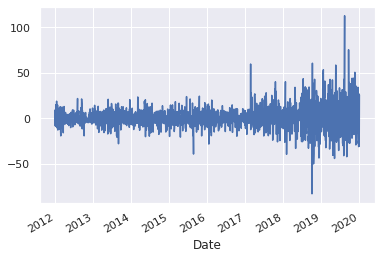

In [16]:
data["1st_diff"].plot()

In [17]:
adf_check(data["1st_diff"].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistics : -12.195968299486637
p-value : 1.254386615122389e-22
# of lags : 16
# of Obs used : 1949
Strong evidence against null hypothesis
Reject Null Hyposthesis
Data has no root and is stationary


Getting the trend

In [ ]:
cl_cyc, cl_trnd = sm.tsa.filters.hpfilter(data.Close)

In [ ]:
data['cl_trnd']=cl_trnd

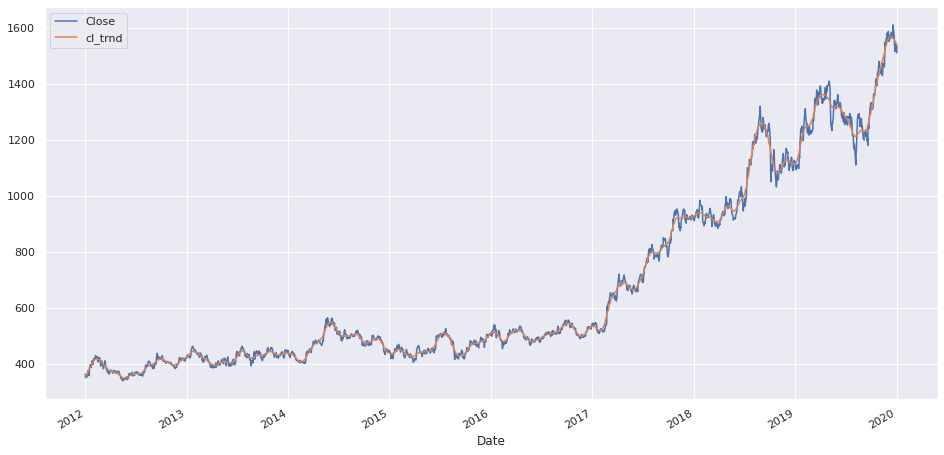

In [ ]:
data[['Close','cl_trnd']].plot(figsize=(16,8))

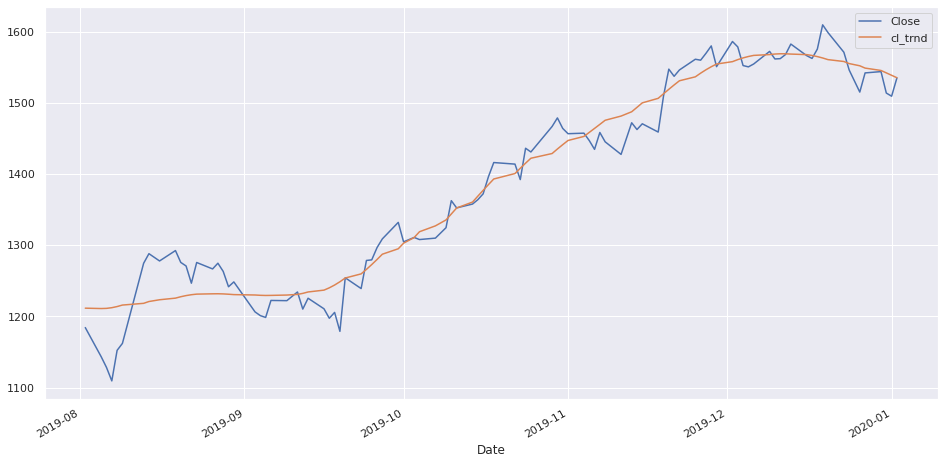

In [ ]:
data[['Close','cl_trnd']].tail(100).plot(figsize=(16,8))

SMA:

In [ ]:
data['6-month-SMA']=data['Close'].rolling(180).mean()
data['12-month-SMA']=data['Close'].rolling(365).mean()

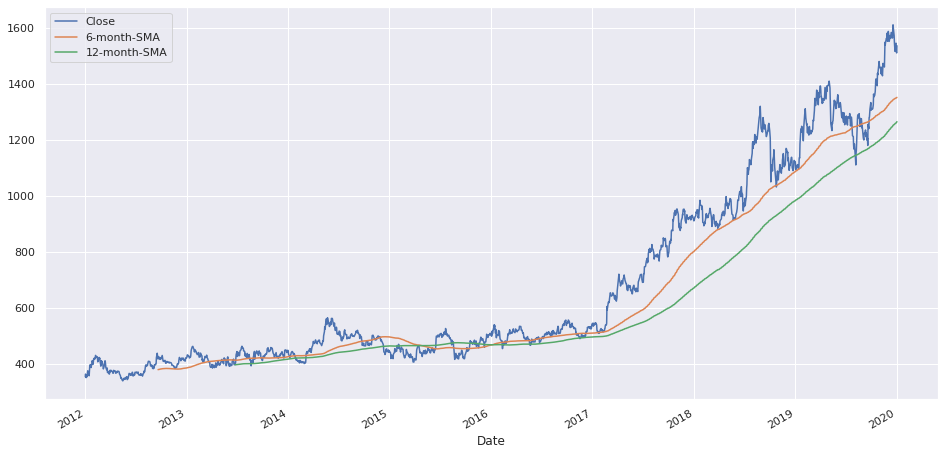

In [ ]:
data[['Close','6-month-SMA','12-month-SMA']].plot(figsize=(16,8))

EWMA:

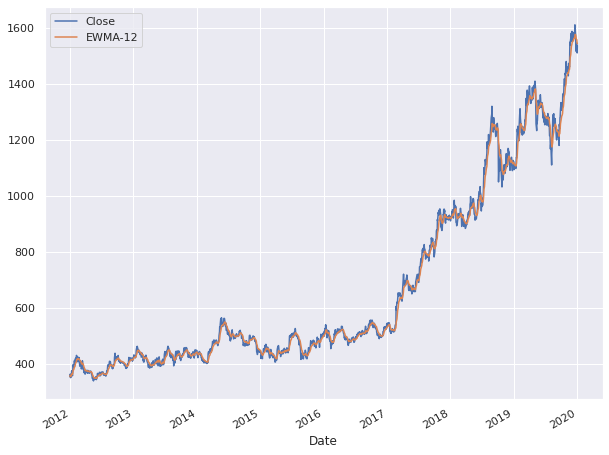

In [ ]:
data['EWMA-12']=data['Close'].ewm(span=12).mean() 
data[['Close','EWMA-12']].plot(figsize=(10,8))

ETS Decomposition:

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_m=seasonal_decompose(data.Close,freq=30,model='multiplicative')
result_a=seasonal_decompose(data.Close,freq=30,model='additive')

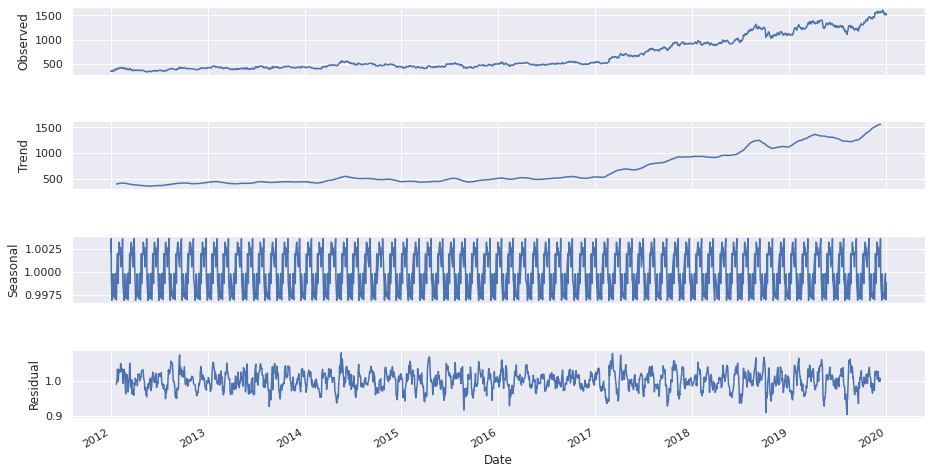

In [ ]:
fig_m=result_m.plot()
fig_m.set_size_inches(15,8)

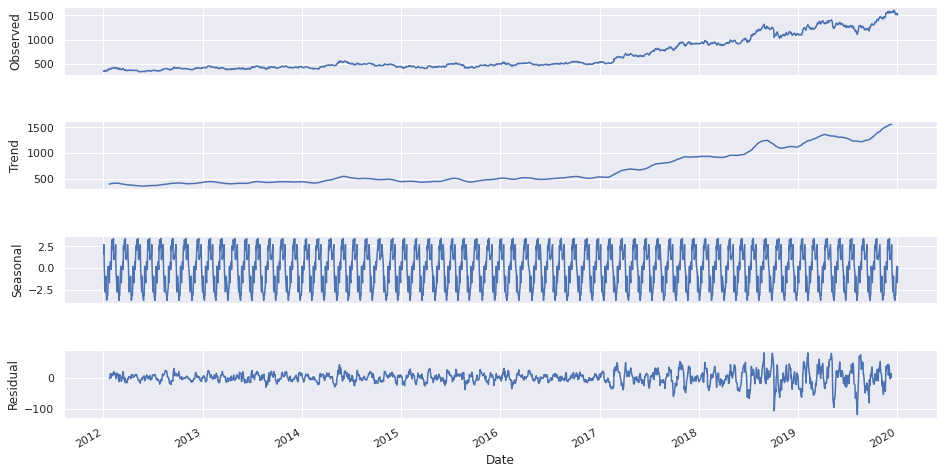

In [ ]:
fig=result_a.plot()
fig.set_size_inches(15,8)

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
High,1967.0,6.765941e+02,3.325211e+02,341.399994,4.375000e+02,5.050000e+02,9.254750e+02,1.617550e+03
Low,1967.0,6.619403e+02,3.253872e+02,336.524994,4.274250e+02,4.960500e+02,9.092250e+02,1.596100e+03
Open,1967.0,6.693877e+02,3.292038e+02,337.500000,4.328000e+02,5.001250e+02,9.187000e+02,1.615000e+03
Close,1967.0,6.690313e+02,3.289335e+02,338.049988,4.322125e+02,5.004750e+02,9.160500e+02,1.609950e+03
Volume,1967.0,7.470097e+06,4.168327e+06,0.000000,4.949204e+06,6.485580e+06,8.694384e+06,5.820785e+07
Adj Close,1967.0,6.483702e+02,3.392140e+02,297.548676,4.013186e+02,4.817267e+02,9.055210e+02,1.609950e+03
cl_trnd,1967.0,6.690313e+02,3.282974e+02,348.176585,4.336316e+02,5.003015e+02,9.211910e+02,1.569264e+03
6-month-SMA,1788.0,6.473115e+02,2.893030e+02,378.189027,4.532476e+02,4.918831e+02,8.603026e+02,1.350765e+03
12-month-SMA,1603.0,6.266477e+02,2.505648e+02,395.527055,4.631774e+02,4.841856e+02,7.697613e+02,1.263972e+03
EWMA-12,1967.0,6.657277e+02,3.253746e+02,347.267019,4.332978e+02,4.996013e+02,9.201450e+02,1.575686e+03


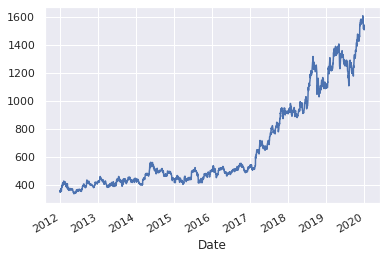

In [ ]:
data['Close'].plot()

Test for stationality:

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result= adfuller(data['Close'])

In [ ]:
def adf_check(time_series):
  result=adfuller(time_series)
  print("Augmented Dickey Fuller Test")
  labels=['ADF Test Statistic','p-value','# of lags','# of Obs used']

  for value,label in zip(result,labels):
    print(label+" : "+str(value))

  if result[1] <= 0.05 :
    print("Strong evidence against Null Hypothesis")
    print("Reject Null Hypothesis")
    print("Data has no unit root and is stationary")

  else:
    print("Weak evidence against null hypothesis")
    print("failed to reject NUll hypothesis")
    print("Data has an unique root, it is non-stationary")

In [ ]:
adf_check(data['Close'])

Augmented Dickey Fuller Test
ADF Test Statistic : 1.639869671730082
p-value : 0.9979723931609519
# of lags : 17
# of Obs used : 1949
Weak evidence against null hypothesis
failed to reject NUll hypothesis
Data has an unique root, it is non-stationary


Error Metric:

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
  return np.mean(np.abs((y_true - y_pred)/ y_true))*100

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('TATAPOWER.NS.csv', index_col=['Date'], parse_dates=['Date'])

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-03,69.000000,69.250000,67.750000,68.349998,65.743179,4792922.0
2019-06-04,67.500000,68.000000,66.449997,66.699997,65.400002,4864404.0
2019-06-06,66.750000,66.949997,64.650002,65.099998,65.099998,4982307.0
2019-06-07,65.000000,66.599998,64.050003,66.300003,66.300003,4984037.0
2019-06-10,66.650002,67.300003,65.949997,66.550003,66.550003,4586585.0


Cleaning the Data:

In [ ]:
drop_cols=['Adj Close', 'Volume']

data.drop(drop_cols, axis=1, inplace=True)

data.head()

,Open,High,Low,Close
Date,,,,
2019-06-03,69.000000,69.250000,67.750000,68.349998
2019-06-04,67.500000,68.000000,66.449997,66.699997
2019-06-06,66.750000,66.949997,64.650002,65.099998
2019-06-07,65.000000,66.599998,64.050003,66.300003
2019-06-10,66.650002,67.300003,65.949997,66.550003


Exploratory Data Analysis (EDA) :

In [ ]:
for cols in data.columns:
  print(cols," ", data[cols].nunique()," Null Values: ", data[cols].isnull().sum())

Open   185  Null Values:  1
High   188  Null Values:  1
Low   192  Null Values:  1
Close   195  Null Values:  1
Adj Close   195  Null Values:  1
Volume   243  Null Values:  1


In [ ]:
data=data.dropna()

In [ ]:
for cols in data.columns:
  print(cols," ", data[cols].nunique()," Null Values: ", data[cols].isnull().sum())

Open   185  Null Values:  0
High   188  Null Values:  0
Low   192  Null Values:  0
Close   195  Null Values:  0
Adj Close   195  Null Values:  0
Volume   243  Null Values:  0


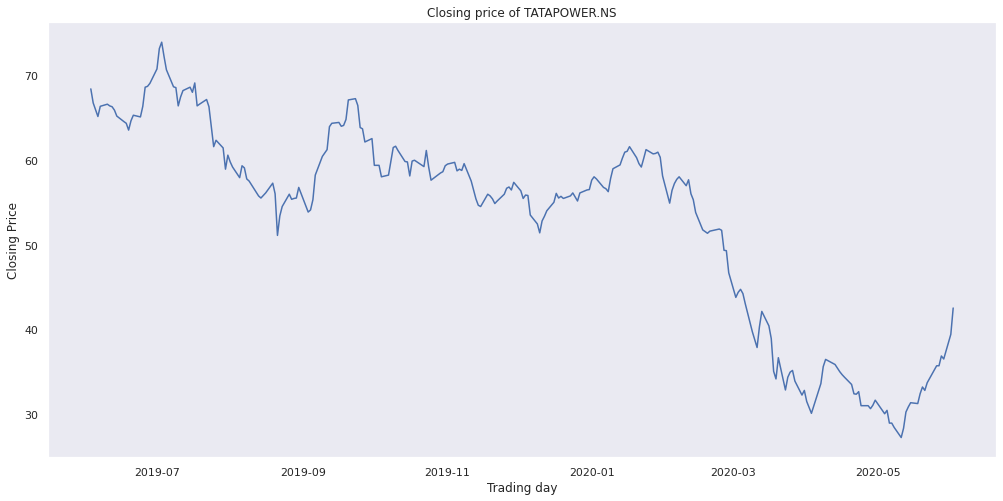

In [ ]:
#plotting the closing price
plt.figure(figsize=(17,8))
plt.plot(data.Close)
plt.title('Closing price of TATAPOWER.NS')
plt.ylabel('Closing Price')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()

- This is not a stationary process
- Hard to tell about the seasonality

Moving Average:

In [ ]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)


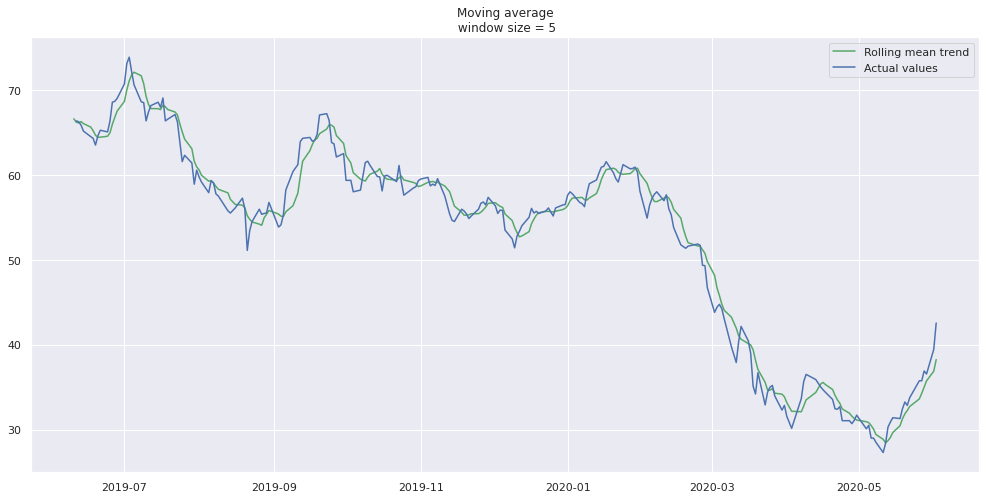

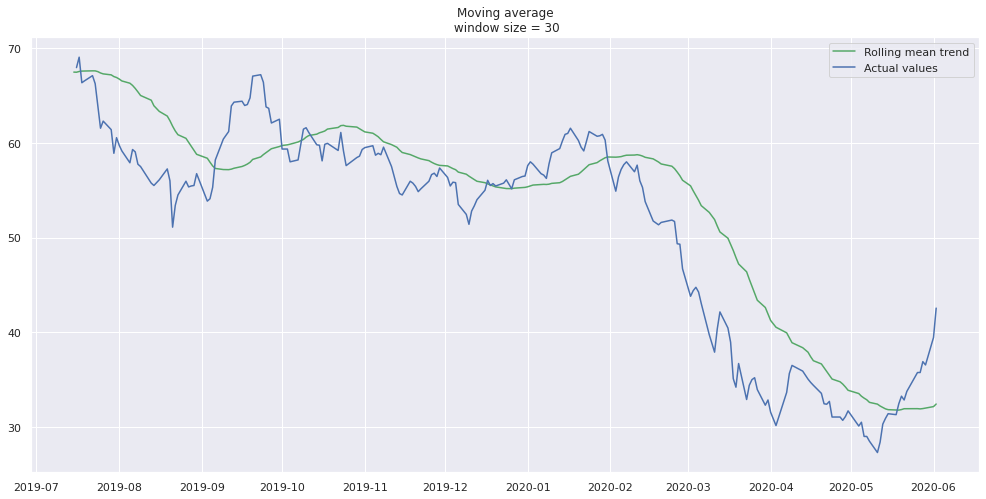

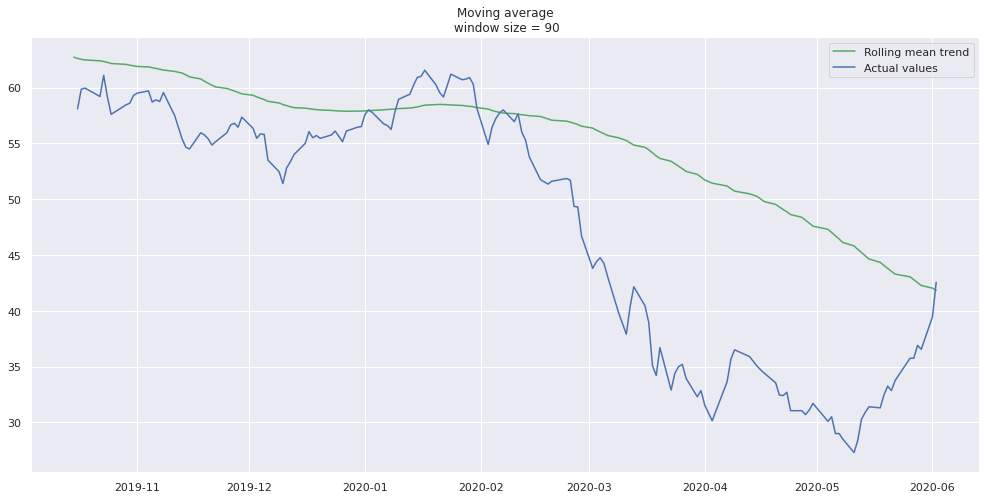

In [ ]:
#Smooth by the previous 5 days (by week)
plot_moving_average(data.Close, 5)

#Smooth by the previous month (30 days)
plot_moving_average(data.Close, 30)

#Smooth by previous quarter (90 days)
plot_moving_average(data.Close, 90)

* The larger the window size, smoother the curve 
> * Easier to spot the trend

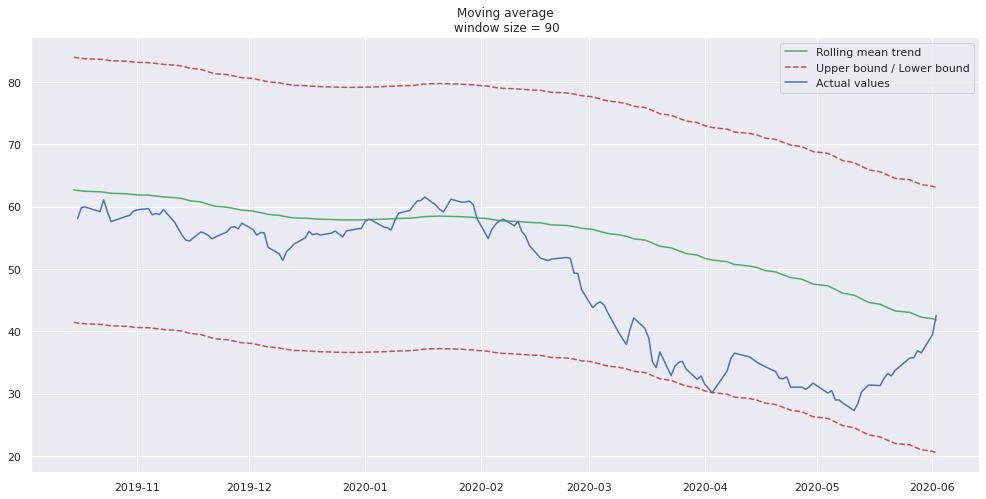

In [ ]:
plot_moving_average(data.Close, 90, plot_intervals=True)

Exponential Smoothing: 

In [ ]:
def exponential_smoothing(series, alpha):

    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [ ]:
def plot_exponential_smoothing(series, alphas):
 
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);

* alpha value 0.1 makes its easier to pick up the trend

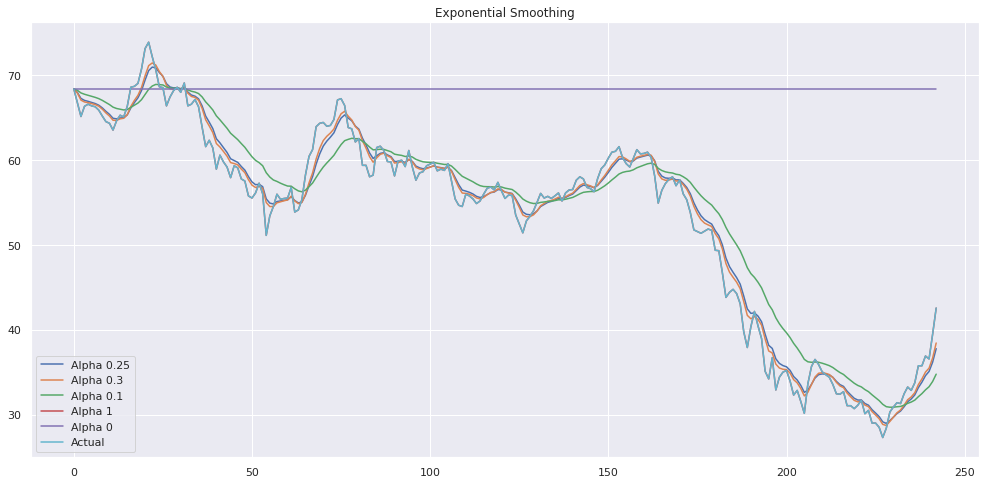

In [ ]:
plot_exponential_smoothing(data.Close, [0.25, 0.3 , 0.1, 1,0])

Double Exponential Smoothing:

In [ ]:
def double_exponential_smoothing(series, alpha, beta):

    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

In [ ]:
def plot_double_exponential_smoothing(series, alphas, betas):
     
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

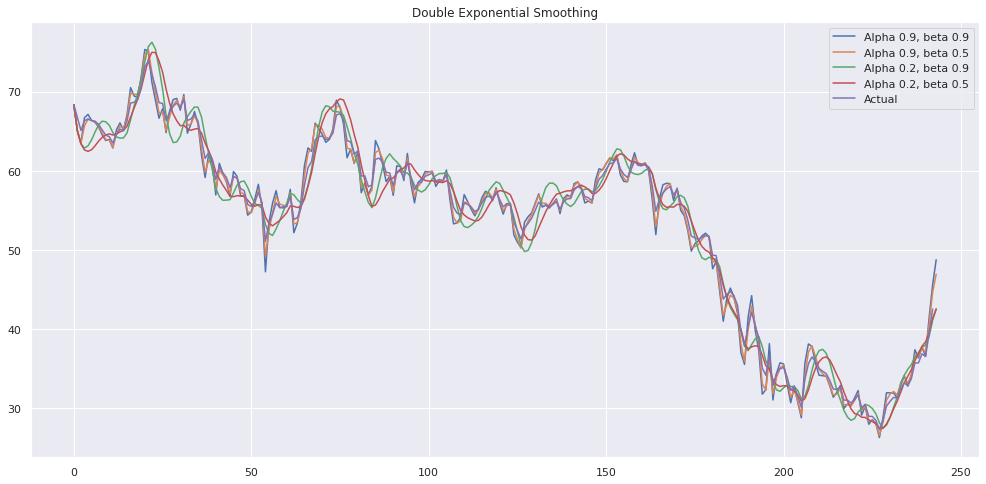

In [ ]:
plot_double_exponential_smoothing(data.Close, alphas=[0.9, 0.2], betas=[0.9, 0.5])

Dickey-Fuller test to see if it is a stationary process:

In [ ]:
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.tsaplots.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.tsaplots.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

* High autocorelation
* No clear seasonality

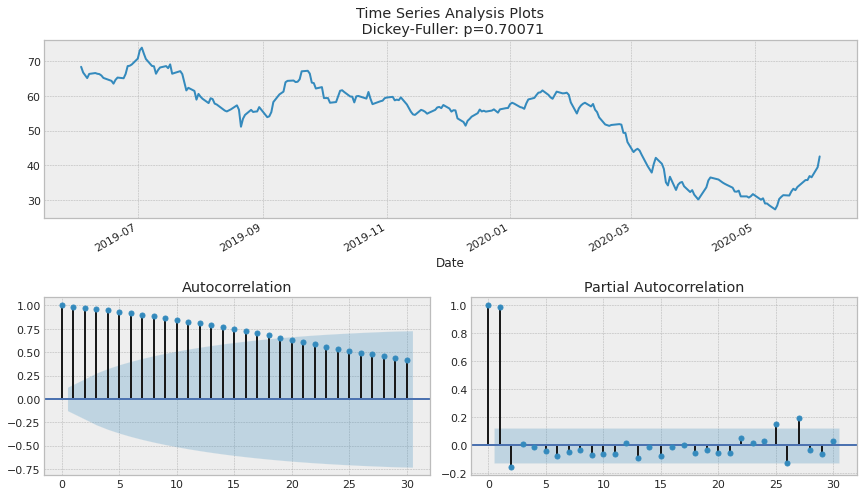

In [ ]:
tsplot(data.Close, lags=30)

* subtract the time series from itself with a lag of one day
> * and we have a stationary process

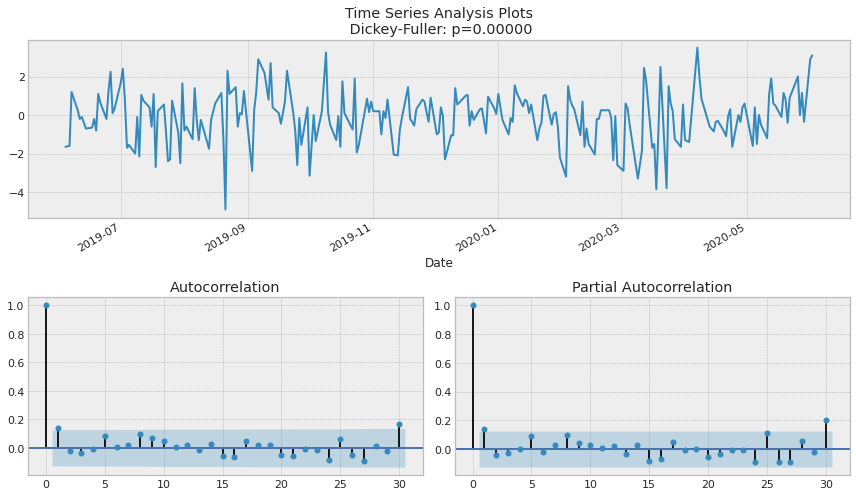

In [ ]:
# Take the first difference to remove to make the process stationary
data_diff = data.Close - data.Close.shift(1)
tsplot(data_diff[1:], lags=30)

In [ ]:
#Set initial values and some bounds
ps = range(0, 5)
d = 1
qs = range(0, 5)
Ps = range(0, 5)
D = 1
Qs = range(0, 5)
s = 5

#Create a list with all possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

625

In [ ]:
parameters_list

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 0, 2),
 (0, 0, 0, 3),
 (0, 0, 0, 4),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 0, 1, 2),
 (0, 0, 1, 3),
 (0, 0, 1, 4),
 (0, 0, 2, 0),
 (0, 0, 2, 1),
 (0, 0, 2, 2),
 (0, 0, 2, 3),
 (0, 0, 2, 4),
 (0, 0, 3, 0),
 (0, 0, 3, 1),
 (0, 0, 3, 2),
 (0, 0, 3, 3),
 (0, 0, 3, 4),
 (0, 0, 4, 0),
 (0, 0, 4, 1),
 (0, 0, 4, 2),
 (0, 0, 4, 3),
 (0, 0, 4, 4),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 0, 2),
 (0, 1, 0, 3),
 (0, 1, 0, 4),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (0, 1, 1, 2),
 (0, 1, 1, 3),
 (0, 1, 1, 4),
 (0, 1, 2, 0),
 (0, 1, 2, 1),
 (0, 1, 2, 2),
 (0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 3, 0),
 (0, 1, 3, 1),
 (0, 1, 3, 2),
 (0, 1, 3, 3),
 (0, 1, 3, 4),
 (0, 1, 4, 0),
 (0, 1, 4, 1),
 (0, 1, 4, 2),
 (0, 1, 4, 3),
 (0, 1, 4, 4),
 (0, 2, 0, 0),
 (0, 2, 0, 1),
 (0, 2, 0, 2),
 (0, 2, 0, 3),
 (0, 2, 0, 4),
 (0, 2, 1, 0),
 (0, 2, 1, 1),
 (0, 2, 1, 2),
 (0, 2, 1, 3),
 (0, 2, 1, 4),
 (0, 2, 2, 0),
 (0, 2, 2, 1),
 (0, 2, 2, 2),
 (0, 2, 2, 3),
 (0, 2, 2, 4),
 (0, 2, 3, 0),
 (0, 2, 3,

In [ ]:
# Train many SARIMA models to find the best set of parameters
def optimize_SARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
    """
    
    results = []
    best_aic = float('inf')
    
    for param in tqdm_notebook(parameters_list):
        try: model = sm.tsa.statespace.SARIMAX(data.Close, order=(param[0], d, param[1]),seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        
        #Save best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])
        
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    #Sort in ascending order, lower AIC is better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [ ]:
result_table = optimize_SARIMA(parameters_list, d, D, s)

#Set parameters that give the lowest AIC (Akaike Information Criteria)
p, q, P, Q = result_table.parameters[0]

best_model = sm.tsa.statespace.SARIMAX(data.Close, order=(p, d, q),seasonal_order=(P, D, Q, s)).fit(disp=-1)

print(best_model.summary())


                                 Statespace Model Results                                
Dep. Variable:                             Close   No. Observations:                  243
Model:             SARIMAX(0, 1, 1)x(2, 1, 3, 5)   Log Likelihood                -407.007
Date:                           Wed, 03 Jun 2020   AIC                            828.015
Time:                                   20:26:20   BIC                            852.291
Sample:                                        0   HQIC                           837.800
                                           - 243                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1651      0.054      3.030      0.002       0.058       0.272
ar.S.L5       -0.1687      0.090     -1.87